In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [1]:
url = 'data/tweeter.sqlite3'
url = 'sqlite:///{}'.format(url)

tweets = pd.read_sql('tweets', url)
users = pd.read_sql('users', url)

In [2]:
# convert date strings to date format
# e.g. pd.to_datetime('Tue Jan 01 13:08:29 +0000 2013', format='%a %b %d %H:%M:%S %z %Y')

'''
+----+-------------------------------------------------------+-------------------------------+
| %a | Weekday as locale’s abbreviated name.                 | Sun, Mon, …, Sat (en_US)      |
+----+-------------------------------------------------------+-------------------------------+
| %b | Month as locale’s abbreviated name.                   | Jan, Feb, …, Dec (en_US);     |
+----+-------------------------------------------------------+-------------------------------+
| %d | Day of the month as a zero-padded decimal number.     | 01, 02, …, 31                 |
+----+-------------------------------------------------------+-------------------------------+
| %H | Hour (24-hour clock) as a zero-padded decimal number. | 00, 01, …, 23                 |
+----+-------------------------------------------------------+-------------------------------+
| %M | Minute as a zero-padded decimal number.               | 00, 01, …, 59                 |
+----+-------------------------------------------------------+-------------------------------+
| %S | Second as a zero-padded decimal number.               | 00, 01, …, 59                 |
+----+-------------------------------------------------------+-------------------------------+
| %Y | Year with century as a decimal number.                | 0001, 0002, …, 2013, 2014, …  |
+----+-------------------------------------------------------+-------------------------------+
| %z | UTC offset in the form ±HHMM[SS[.ffffff]]             | (empty), +0000, -0400, +1030, |
|    | (empty string if the object is naive).                | +063415, -030712.345216       |
+----+-------------------------------------------------------+-------------------------------+
'''
users['created_at'] = pd.to_datetime(users['created_at'], format='%a %b %d %H:%M:%S %z %Y')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S %z %Y')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       8203 non-null   int64              
 1   tid                      8203 non-null   object             
 2   tweet                    8203 non-null   object             
 3   user_id                  8203 non-null   int64              
 4   coordinates              8203 non-null   object             
 5   created_at               8203 non-null   datetime64[ns, UTC]
 6   favourites_count         8203 non-null   int64              
 7   in_reply_to_screen_name  2184 non-null   object             
 8   in_reply_to_status_id    0 non-null      object             
 9   in_reply_to_user_id      2184 non-null   float64            
 10  lang                     8203 non-null   object             
 11  quoted_status_id         829 n

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                8203 non-null   int64              
 1   uid               8203 non-null   object             
 2   name              8203 non-null   object             
 3   screen_name       8203 non-null   object             
 4   created_at        8203 non-null   datetime64[ns, UTC]
 5   description       7276 non-null   object             
 6   followers_count   8203 non-null   int64              
 7   friends_count     0 non-null      object             
 8   statuses_count    8203 non-null   int64              
 9   favourites_count  8203 non-null   int64              
 10  listed_count      8203 non-null   int64              
 11  geo_enabled       8203 non-null   bool               
 12  lang              0 non-null      object             
dtypes: 

In [5]:
hours = users['created_at'].dt.hour.to_numpy()

In [6]:
type(_)

str

In [7]:
hours = users['created_at'].dt.hour.values

In [10]:
np.histogram(hours)

(array([ 772,  553,  630, 1132,  822,  861, 1250,  692,  648,  843],
       dtype=int64),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]))

In [12]:
bins = np.arange(24)

In [13]:
np.histogram(hours, bins)

(array([247, 257, 268, 277, 276, 290, 340, 335, 353, 444, 421, 401, 415,
        446, 446, 437, 367, 354, 338, 327, 321, 284, 559], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]))

(array([ 772.,  553.,  630., 1132.,  822.,  861., 1250.,  692.,  648.,
         843.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

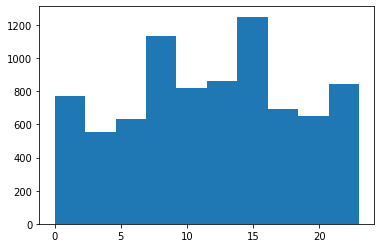

In [18]:
plt.hist(hours)

(array([247., 257., 268., 277., 276., 290., 340., 335., 353., 444., 421.,
        401., 415., 446., 446., 437., 367., 354., 338., 327., 321., 284.,
        559.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <BarContainer object of 23 artists>)

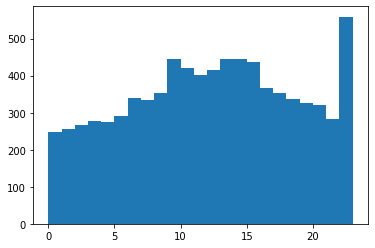

In [19]:
plt.hist(hours, bins=bins)

In [20]:
bins = np.arange(0,24,2)

In [21]:
np.digitize(hours, bins)

array([11,  1, 11, ...,  5,  5, 11], dtype=int64)

In [22]:
hours

array([20,  1, 20, ...,  8,  9, 21], dtype=int64)